In [41]:
import numpy as np

# Path to the saved .npz file
load_path = r"R:\Experiment_Data\TimeTagger\TK_015_v3_multimode_sources_ZEP_reflow\SourceCharacterisation_CAR\carmeasurement.npz"

# Load the data
data = np.load(load_path, allow_pickle=True)

# Check available keys
print("Available variables:")
print(data.files)


Available variables:
['InputDelay_Ch1', 'InputDelay_Ch2', 'TriggerLevel_Ch1', 'TriggerLevel_Ch2', 'CountTime', 'binWidth', 'binNumber', 'AvgTimeDelay_0', 'PeakTimeDelay_0', 'PowerLevelSet_arr', 'PowerLevelAct_laser_arr', 'PowerLevelAct_beforeChip_arr', 'PowerLevelAct_afterChip_arr', 'PowerLevelAct_onChip_arr', 'timeData', 'CorrData', 'CorrDataNorm', 'Coincid_Data', 'Ncc', 'Nacc', 'Ncc_index', 'CAR', 'channel_1_counts', 'channel_2_counts', 'channel_1_rate', 'channel_2_rate', 'coincidences', 'coincidence_rate', 'accidental_rate', 'contrast_CAR']


In [ ]:
print(data['CountTime'])

In [ ]:

# coincid_data = data['Coincid_Data'].item()  # ✅ This is now a plain dictionary
# print(coincid_data['coincidence_rate'])   

In [ ]:
import matplotlib.pyplot as plt

# Load and convert units
channel1_rate_kHz = data['channel_1_rate'] / 1e3  # Hz → kHz
on_chip_power_uW = data['PowerLevelAct_onChip_arr'] * 1e6  # W → µW

# Plot
plt.figure(figsize=(6, 4))
plt.plot(on_chip_power_uW, channel1_rate_kHz, marker='o', linestyle='-')

# Labels
plt.xlabel("On-Chip Power (µW)")
plt.ylabel("Channel 1 Count Rate (kHz)")
plt.title("Channel 1 Count Rate vs. On-Chip Power")
plt.grid(True)
plt.tight_layout()
plt.show()


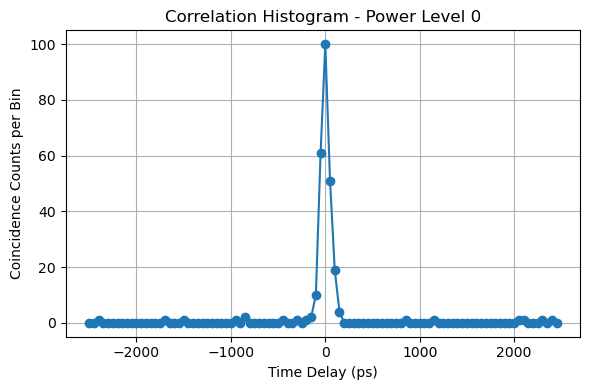

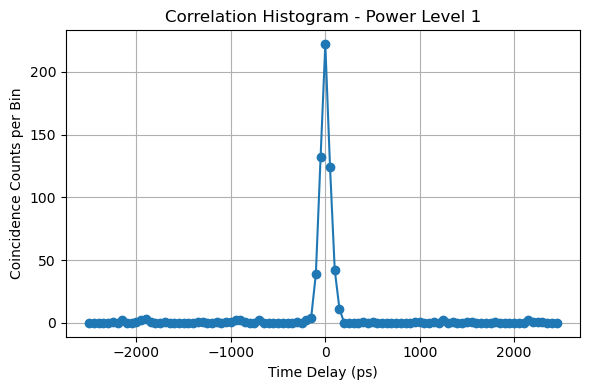

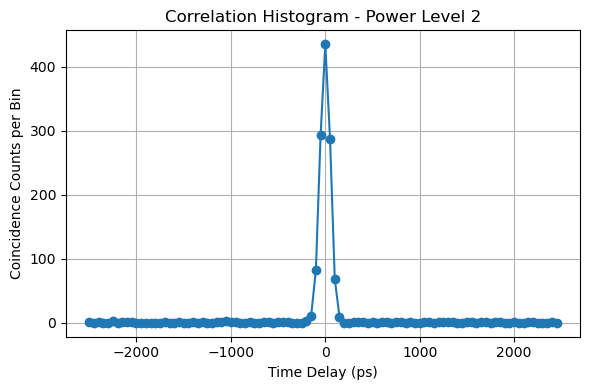

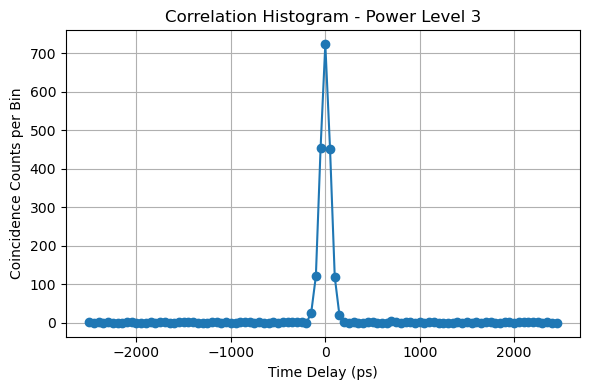

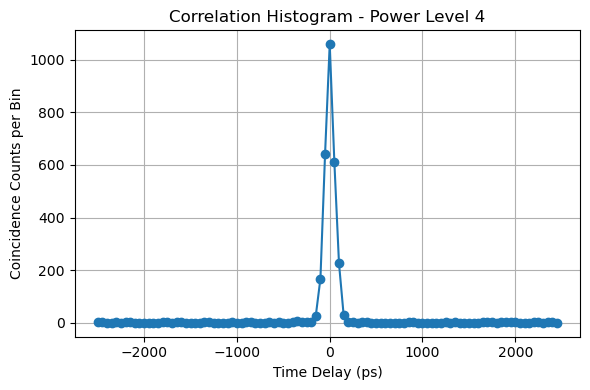

In [43]:
import matplotlib.pyplot as plt

CorrData = data['CorrData']
timeData = data['timeData']

PowerLevelCount = CorrData.shape[0]  # or len(data['PowerLevelSet_arr'])

for i in range(PowerLevelCount):
    plt.figure(figsize=(6,4))
    plt.plot(timeData[i], CorrData[i], marker='o', linestyle='-')
    plt.xlabel("Time Delay (ps)")
    plt.ylabel("Coincidence Counts per Bin")
    plt.title(f"Correlation Histogram - Power Level {i}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Power index 0: Coincidences = 100.0, Accidentals = 0.41666666666666663, CAR = 239.0
Power index 1: Coincidences = 222.0, Accidentals = 1.03125, CAR = 214.27272727272728
Power index 2: Coincidences = 435.0, Accidentals = 1.59375, CAR = 271.94117647058823
Power index 3: Coincidences = 723.0, Accidentals = 2.5208333333333335, CAR = 285.80991735537185
Power index 4: Coincidences = 1059.0, Accidentals = 4.3125, CAR = 244.56521739130434


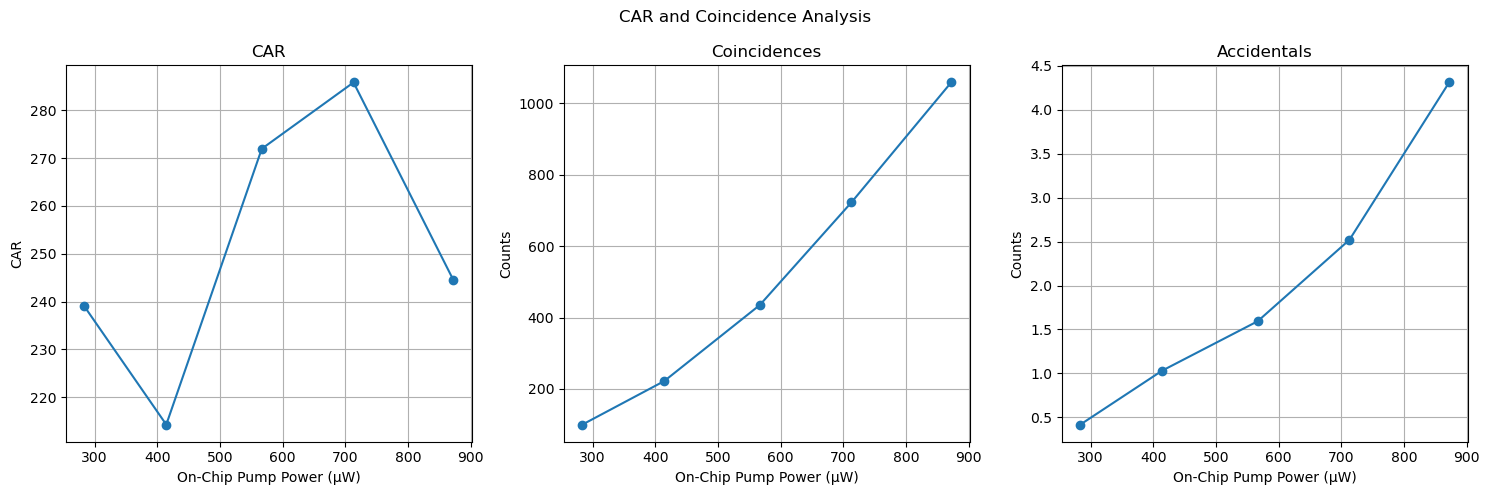

In [42]:

# Extract arrays from file
timeData = data['timeData']                # shape (PowerLevelCount, binNum)
CorrData = data['CorrData']                # shape (PowerLevelCount, binNum)
PowerLevelAct_onChip_arr = data['PowerLevelAct_onChip_arr']  # shape (PowerLevelCount,)

# Convert on-chip power to µW
on_chip_uW = PowerLevelAct_onChip_arr * 1e6

# Number of power levels
PowerLevelCount = CorrData.shape[0]

# Initialise arrays
Ncc = np.empty(PowerLevelCount)
Ncc_index = np.empty(PowerLevelCount, dtype=int)
Nacc = np.empty(PowerLevelCount)
CAR = np.empty(PowerLevelCount)

# Calculate CAR, coincidence peak and accidentals
for i in range(PowerLevelCount):
    Ncc[i] = CorrData[i, :].max()
    Ncc_index[i] = CorrData[i, :].argmax()

    # Average of accidentals on either side of the coincidence peak (skip ±2 bins)
    left = CorrData[i, :int(Ncc_index[i])-2]
    right = CorrData[i, int(Ncc_index[i])+2:]
    Nacc[i] = (left.mean() + right.mean()) / 2 if len(left) > 0 and len(right) > 0 else 0

    # CAR = (Coincidences - Accidentals) / Accidentals
    if Nacc[i] > 0:
        CAR[i] = (Ncc[i] - Nacc[i]) / Nacc[i]
    else:
        CAR[i] = 0

    print(f"Power index {i}: Coincidences = {Ncc[i]}, Accidentals = {Nacc[i]}, CAR = {CAR[i]}")

# === Plotting ===
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(on_chip_uW, CAR, marker='o')
ax[0].set_title('CAR')
ax[0].set_xlabel('On-Chip Pump Power (µW)')
ax[0].set_ylabel('CAR')
ax[0].grid(True)

ax[1].plot(on_chip_uW, Ncc, marker='o')
ax[1].set_title('Coincidences')
ax[1].set_xlabel('On-Chip Pump Power (µW)')
ax[1].set_ylabel('Counts')
ax[1].grid(True)

ax[2].plot(on_chip_uW, Nacc, marker='o')
ax[2].set_title('Accidentals')
ax[2].set_xlabel('On-Chip Pump Power (µW)')
ax[2].set_ylabel('Counts')
ax[2].grid(True)

plt.suptitle('CAR and Coincidence Analysis')
plt.tight_layout()
plt.show()
